In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [128]:
df = pd.read_csv("./train.csv")
df.shape

(1460, 81)

In [129]:
df.LotArea

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. Xác định các thuộc tính
1. Input: Tất cả ngoại trừ SalePrice
2. Output: SalePrice
3. Type of variable: <br/>
    3.1 Predictor: khác SalePrice <br/>
    3.2 Target: SalePrice <br/>
4. Data Type: <br/>
    4.1 Charactor/String <br/>
    4.2 Numeric <br/>
5. Variable Category:<br/>
    5.1 Categorical: kieu so, kieu chuoi  <br/>
    5.2 Continuous: int, float

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [132]:
numbers = [f for f in df.columns if df.dtypes[f] != 'object'] # Quantitative: # du lieu kieu so
list_nums = ', '.join(numbers)
list_nums

'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

In [133]:
objects = [f for f in df.columns if df.dtypes[f] == 'object'] # Qualitative : # du lieu kieu chuoi
list_obj = ', '.join(objects)
list_obj

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

In [134]:
i = 1
for obj in objects:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique())
    i = i+1

1 / MSZoning 	 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / Street 	 2 : ['Pave' 'Grvl']
3 / Alley 	 3 : [nan 'Grvl' 'Pave']
4 / LotShape 	 4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / LandContour 	 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / Utilities 	 2 : ['AllPub' 'NoSeWa']
7 / LotConfig 	 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / LandSlope 	 3 : ['Gtl' 'Mod' 'Sev']
9 / Neighborhood 	 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / Condition1 	 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / Condition2 	 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / BldgType 	 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 / HouseStyle 	 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 / RoofStyle 	 6 : ['Gable' 'Hip' 'Gambrel

In [135]:
i = 1
for obj in numbers:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique() if len(df[obj].unique())<120 else '')
    i = i+1

1 / Id 	 1460 : 
2 / MSSubClass 	 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
3 / LotFrontage 	 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
4 / LotArea 	 1073 : 
5 / OverallQual 	 10 : [ 7  6  8  5  9  4 10  3  1  2]
6 / OverallCond 	 9 : [5 8 6 7 4 2 3 9 1]
7 / YearBuilt 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 19

# features = 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'   
+ LotArea: biến liên tục
+ Yearbuilt: biến rời rạc
+ 1stFlrSF: biến liên tục
+ 2ndFlrSF: biến liên tục
+ FullBath: biến rời rạc
+ BedroomAbvGr: biến rời rạc
+ TotRmsAbvGrd: biến rời rạc

## 2. Phân tích đơn biến

In [136]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [137]:
fearture_con= ['LotArea', '1stFlrSF', '2ndFlrSF']
#df[fearture_con].head()
df[fearture_con].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   LotArea   1460 non-null   int64
 1   1stFlrSF  1460 non-null   int64
 2   2ndFlrSF  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


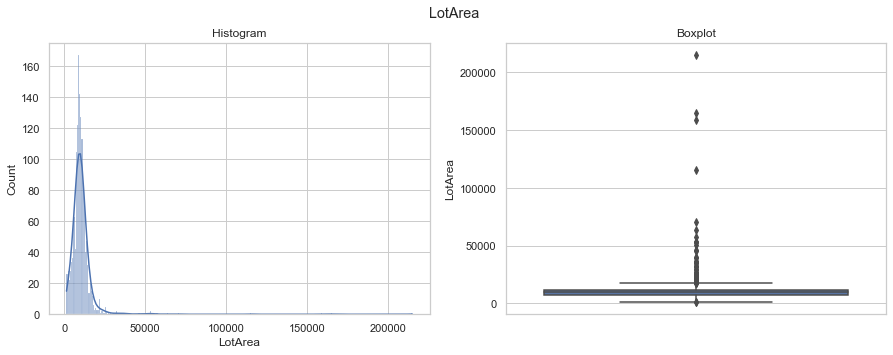

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(ax=axes[0], x=df.LotArea, kde=True)
sns.boxplot(ax=axes[1], y=df.LotArea)

fig.suptitle('LotArea')
axes[0].set_title('Histogram')
axes[1].set_title('Boxplot')
plt.show()

Dựa vào biểu đồ, ta thấy:
+ dữ liệu trải dài từ 0 đến hơn 200000
+ nhưng tập trung chủ yếu từ 0 đến khoảng 10000
+ outlier xuất hiện từ khoảng trên 10000 đến 200000

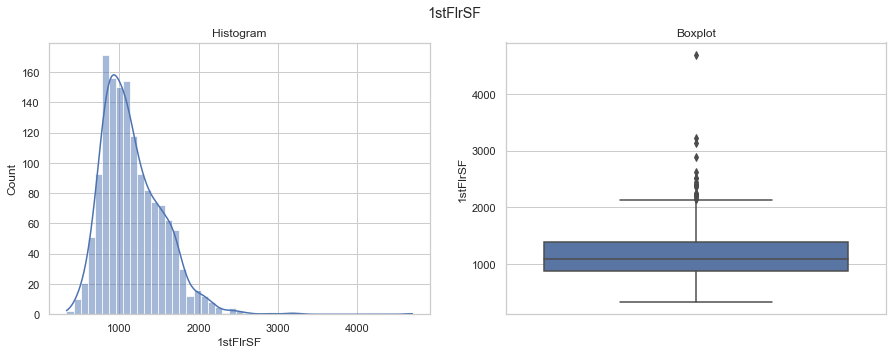

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(ax=axes[0], x=df['1stFlrSF'], kde=True)
sns.boxplot(ax=axes[1], y=df['1stFlrSF'])

fig.suptitle('1stFlrSF')
axes[0].set_title('Histogram')
axes[1].set_title('Boxplot')
plt.show()

Dựa vào biểu đồ, ta thấy:
+ dữ liệu trải dài từ 500 đến hơn 4000
+ nhưng tập trung chủ yếu từ 500 đến khoảng 2000
+ outlier xuất hiện từ khoảng trên 2000 đến 4000

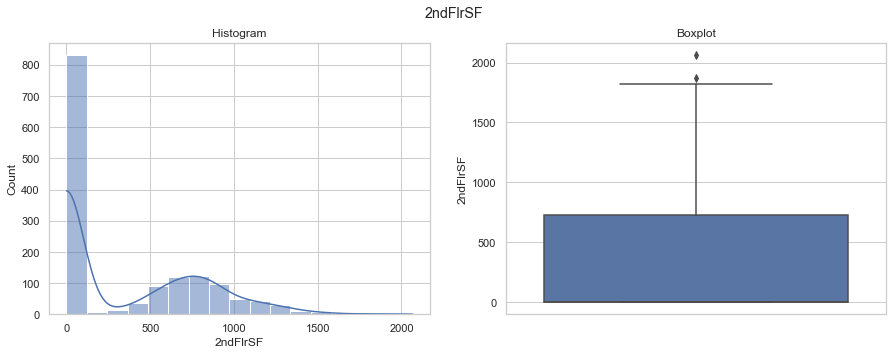

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(ax=axes[0], x=df['2ndFlrSF'], kde=True)
sns.boxplot(ax=axes[1], y=df['2ndFlrSF'])

fig.suptitle('2ndFlrSF')
axes[0].set_title('Histogram')
axes[1].set_title('Boxplot')
plt.show()

Dựa vào biểu đồ, ta thấy:
+ dữ liệu trải dài từ 0 đến hơn 2000
+ nhưng tập trung chủ yếu từ 0 đến khoảng 100 và phân bố từ 400 đến 1400
+ outlier xuất hiện từ khoảng trên 1500 đến 2000

In [141]:
df[fearture_con].mean()

LotArea     10516.828082
1stFlrSF     1162.626712
2ndFlrSF      346.992466
dtype: float64

In [142]:
df[fearture_con].mode()

,LotArea,1stFlrSF,2ndFlrSF
0,7200,864,0


In [143]:
df[fearture_con].skew()

LotArea     12.207688
1stFlrSF     1.376757
2ndFlrSF     0.813030
dtype: float64

In [144]:
df[fearture_con].kurtosis()

LotArea     203.243271
1stFlrSF      5.745841
2ndFlrSF     -0.553464
dtype: float64

Dựa theo số liệu, ta thấy:
+ LotArea không phải phân phối chuẩn (kurtosis > 3)
+ 1stFlrSF không phải phân phối chuẩn (kurtosis > 3)
+ 2ndFlrSF không phải phân phối chuẩn (kurtosis < 3)

In [145]:
from scipy import stats

In [146]:
percentiles = np.array([25, 75])
x_LotArea = np.percentile(df['LotArea'], percentiles)
IQR_LotArea = stats.iqr(df['LotArea'])
x_LotArea, IQR_LotArea

(array([ 7553.5, 11601.5]), 4048.0)

In [147]:
x_LotArea[1] + 1.5*IQR_LotArea

17673.5

In [148]:
a = df[(df['LotArea'] > x_LotArea[1] + 1.5*IQR_LotArea) | (df['LotArea'] < x_LotArea[0] - 1.5*IQR_LotArea)]
a.index

Int64Index([  53,   66,  113,  120,  159,  171,  185,  197,  249,  260,  271,
             277,  304,  313,  335,  349,  364,  384,  411,  417,  422,  451,
             457,  523,  529,  558,  563,  588,  661,  664,  666,  691,  692,
             706,  726,  769,  807,  828,  848,  854,  876,  934,  939,  943,
             956, 1010, 1039, 1048, 1057, 1061, 1107, 1151, 1169, 1173, 1184,
            1190, 1230, 1260, 1270, 1277, 1287, 1298, 1346, 1383, 1396, 1409,
            1423, 1430, 1446],
           dtype='int64')

(1391, 81)


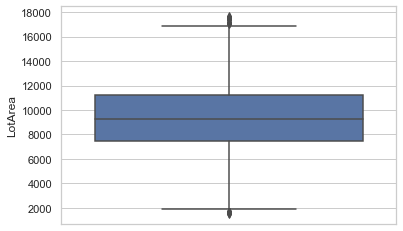

In [149]:
if (len(a)/1460 ) * 100 < 5:
    df = df.drop(index= a.index)
    print(df.shape)
    sns.boxplot(y=df['LotArea'])
    plt.show()
else:
    print('outlier chiếm hơn 5% so với dữ liệu')

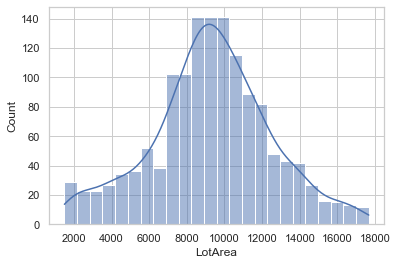

In [150]:
sns.histplot(df['LotArea'], kde=True)
plt.show()

Sau khi xóa outlier, ta thấy biểu đồ trở nên gần như chuẩn

In [151]:
percentiles = np.array([25, 75])
x_b = np.percentile(df['1stFlrSF'], percentiles)
IQR_b = stats.iqr(df['1stFlrSF'])
x_b, IQR_b

(array([ 874.5, 1362. ]), 487.5)

In [152]:
x_b[1] + 1.5*IQR_b

2093.25

In [153]:
b = df[(df['1stFlrSF'] > x_b[1] + 1.5*IQR_b) | (df['1stFlrSF'] < x_b[0] - 1.5*IQR_b)]
b.index

Int64Index([  70,  175,  178,  224,  278,  440,  496,  654,  888,  898, 1024,
            1044, 1175, 1182, 1205, 1223, 1250, 1373, 1381],
           dtype='int64')

(1372, 81)


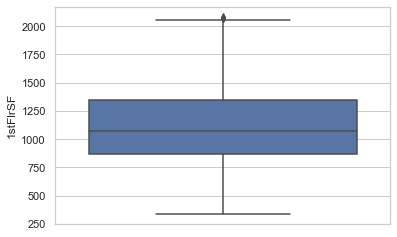

In [154]:
if (len(b)/1460 ) * 100 < 5:
    df = df.drop(index= b.index)
    print(df.shape)
    sns.boxplot(y=df['1stFlrSF'])
    plt.show()
else:
    print('outlier chiếm hơn 5% so với dữ liệu')

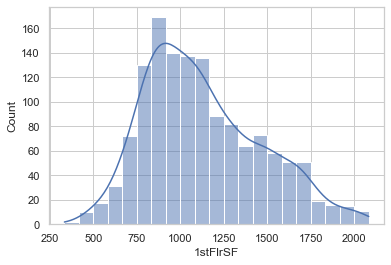

In [155]:
sns.histplot(df['1stFlrSF'], kde=True)
plt.show()

Sau khi xóa outlier, ta thấy biểu đồ trở nên gần như chuẩn và không còn lệch phải

In [156]:
percentiles = np.array([25, 75])
x_c = np.percentile(df['2ndFlrSF'], percentiles)
IQR_c = stats.iqr(df['2ndFlrSF'])
x_c, IQR_c

(array([  0., 728.]), 728.0)

In [157]:
x_c[1] + 1.5*IQR_c

1820.0

In [158]:
c = df[(df['2ndFlrSF'] > x_c[1] + 1.5*IQR_c) | (df['2ndFlrSF'] < x_c[0] - 1.5*IQR_c)]
c.index

Int64Index([], dtype='int64')

(1372, 81)


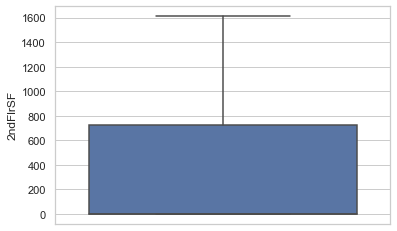

In [159]:
if (len(c)/1460 ) * 100 < 5:
    df = df.drop(index= c.index)
    print(df.shape)
    sns.boxplot(y=df['2ndFlrSF'])
    plt.show()
else:
    print('outlier chiếm hơn 5% so với dữ liệu')

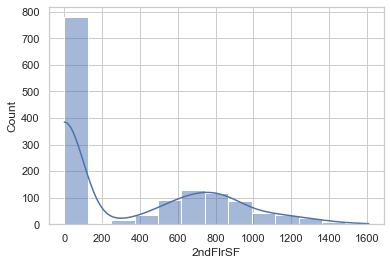

In [160]:
sns.histplot(df['2ndFlrSF'], kde=True)
plt.show()

Sau khi xóa outlier, ta thấy biểu đồ trở nên gần như chuẩn

In [161]:
fearture_cate= ['FullBath', 'BedroomAbvGr','TotRmsAbvGrd']
df[fearture_cate].head()

,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,2,3,8
1,2,3,6
2,2,3,6
3,1,3,7
4,2,4,9


In [162]:
df['FullBath'].value_counts()

2    715
1    627
3     23
0      7
Name: FullBath, dtype: int64

In [163]:
df['BedroomAbvGr'].value_counts()

3    766
2    345
4    184
1     45
5     20
6      7
0      4
8      1
Name: BedroomAbvGr, dtype: int64

In [164]:
df['TotRmsAbvGrd'].value_counts()

6     393
7     307
5     265
8     174
4      93
9      64
10     36
11     16
3      16
12      6
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

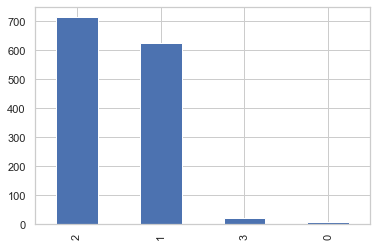

In [165]:
sns.set_theme(style="whitegrid")
df['FullBath'].value_counts().plot.bar()
plt.show()

Dựa vào biểu đồ ta thấy:
+ dữ liệu tập trung nhiều ở 2 và 1, ~ 750 và 650
+ dữ liệu tập trung ít ở 3 và 0, ~ 50 và 10
+ dữ liệu của 3 và 0 quá ít, có thể loại bỏ hoặc gộp cụm mới

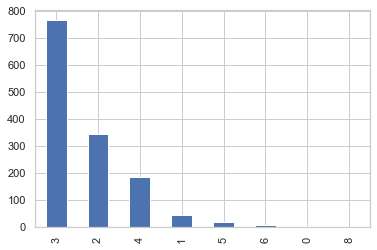

In [166]:
sns.set_theme(style="whitegrid")
df['BedroomAbvGr'].value_counts().plot.bar()
plt.show()

Dựa vào biểu đồ ta thấy:
+ dữ liệu tập trung nhiều nhất ở 3, ~ 800
+ dữ liệu tập trung ít nhất ở 8 và 0, chưa đến 10
+ dữ liệu của 1, 5, 6, 0 và 8 quá ít, có thể loại bỏ hoặc gộp cụm mới

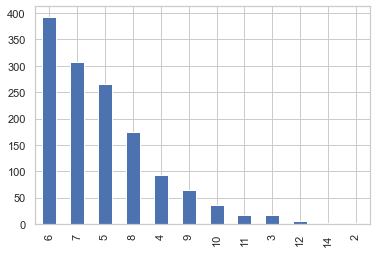

In [167]:
sns.set_theme(style="whitegrid")
df['TotRmsAbvGrd'].value_counts().plot.bar()
plt.show()

Dựa vào biểu đồ ta thấy:
+ dữ liệu tập trung nhiều nhất ở 6, ~ 400
+ dữ liệu tập trung ít nhất ở 14 và 2, chưa đến 10
+ dữ liệu của 11, 3, 12, 14 và 2 quá ít, có thể loại bỏ hoặc gộp cụm mới

<Figure size 1080x720 with 0 Axes>

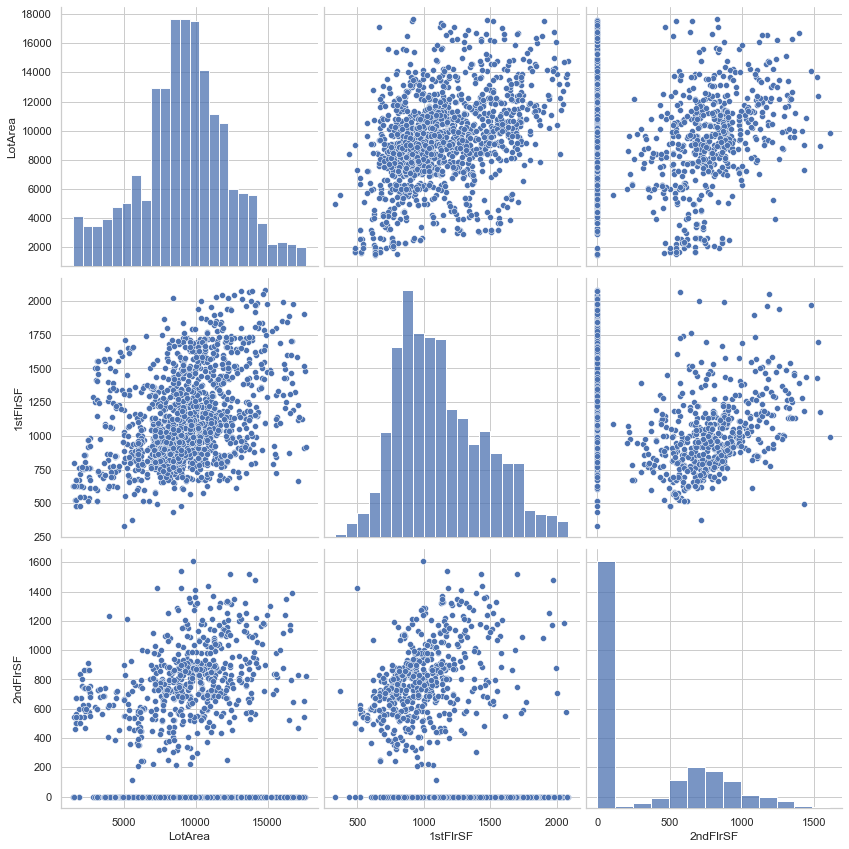

In [168]:
plt.figure(figsize=(15,10))
sns.pairplot(df[fearture_con],height=4)
plt.show()

In [169]:
df[fearture_con].corr()

,LotArea,1stFlrSF,2ndFlrSF
LotArea,1.000000,0.415632,0.106758
1stFlrSF,0.415632,1.000000,-0.259756
2ndFlrSF,0.106758,-0.259756,1.000000


Dựa vào biểu đồ và dữ liệu ta thấy:
+ LotArea và 1stFlrSF không tương quan với nhau (~ 0,3)
+ LotArea và 2ndFlrSF không tương quan với nhau (~ 0,05)
+ 2ndFlrSF và 1stFlrSF không tương quan với nhau (~ -0,2)

In [170]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [171]:
table=pd.crosstab(df['FullBath'],df['BedroomAbvGr'])
table

BedroomAbvGr,0,1,2,3,4,5,6,8
FullBath,,,,,,,,
0,3,2,2,0,0,0,0,0
1,1,38,207,339,37,5,0,0
2,0,5,136,421,133,12,7,1
3,0,0,0,6,14,3,0,0


In [172]:
stat, p, dof, expected = chi2_contingency(table)

In [173]:
prob=0.95
critical= chi2.ppf(prob,dof)

In [174]:
alpha= 1.0 - prob
print ('signification= %.3f, p= %.3f' %(alpha,p) )
if p <= alpha:
    print('Dependent(reject H0)')
else:
    print('Independent(fail to reject H0)')

signification= 0.050, p= 0.000
Dependent(reject H0)


=> hai biến FullBath và BedroomAbvGr phụ thuộc nhau

In [175]:
def func_chisquare(a, b):
    table=pd.crosstab(a, b)
    print(table)
    stat, p, dof, expected = chi2_contingency(table)
    prob=0.95
    critical= chi2.ppf(prob,dof)
    alpha= 1.0 - prob
    print ('signification= %.3f, p= %.3f' %(alpha,p) )
    if p <= alpha:
        print('Dependent(reject H0)')
    else:
        print('Independent(fail to reject H0)')

In [176]:
func_chisquare(df['FullBath'], df['TotRmsAbvGrd'])

TotRmsAbvGrd  2   3   4    5    6    7    8   9   10  11  12  14
FullBath                                                        
0              0   1   3    0    2    1    0   0   0   0   0   0
1              1  15  76  204  219   76   28   7   1   0   0   0
2              0   0  14   60  172  227  142  52  34   9   4   1
3              0   0   0    1    0    3    4   5   1   7   2   0
signification= 0.050, p= 0.000
Dependent(reject H0)


=> hai biến FullBath và TotRmsAbvGrd phụ thuộc nhau

In [177]:
func_chisquare(df['BedroomAbvGr'], df['TotRmsAbvGrd'])

TotRmsAbvGrd  2   3   4    5    6    7   8   9   10  11  12  14
BedroomAbvGr                                                   
0              0   1   1    1    1    0   0   0   0   0   0   0
1              1  13  17    4    5    4   1   0   0   0   0   0
2              0   2  71  141   97   29   4   0   0   1   0   0
3              0   0   3  118  282  238  92  22   9   2   0   0
4              0   0   1    1    8   36  72  38  16  11   1   0
5              0   0   0    0    0    0   5   3   7   2   3   0
6              0   0   0    0    0    0   0   1   4   0   2   0
8              0   0   0    0    0    0   0   0   0   0   0   1
signification= 0.050, p= 0.000
Dependent(reject H0)


=> hai biến BedroomAbvGr và TotRmsAbvGrd phụ thuộc nhau

In [178]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [179]:
df2=df[['FullBath','LotArea']]

In [180]:
model= ols('LotArea ~ C(FullBath)', data=(df2)).fit()
anova_table= sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(FullBath),5.853146e+08,3.0,20.17057,8.571641e-13
Residual,1.323232e+10,1368.0,NaN,NaN


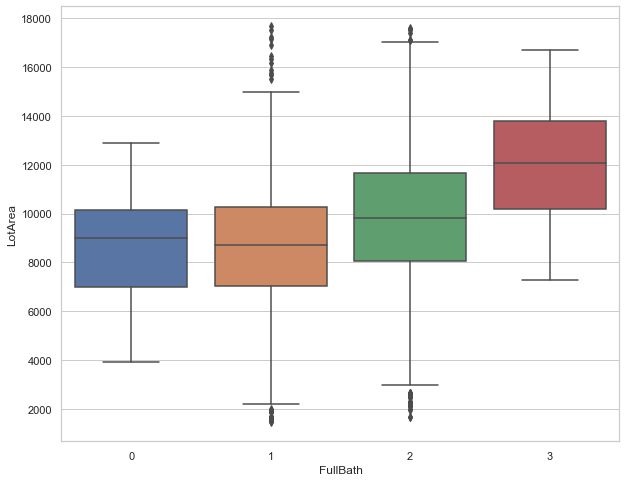

In [181]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df["FullBath"], y=df["LotArea"])
plt.show()

In [182]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
compair= pairwise_tukeyhsd(endog=df['LotArea'],groups=df["FullBath"],alpha=0.05)
print(compair)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1   16.1112    0.9 -3024.3701 3056.5925  False
     0      2 1088.8845 0.7678 -1949.5303 4127.2993  False
     0      3 3547.0373 0.0415    93.7859 7000.2886   True
     1      2 1072.7733  0.001     635.08 1510.4667   True
     1      3 3530.9261  0.001   1832.528 5229.3242   True
     2      3 2458.1528 0.0011    763.457 4152.8485   True
----------------------------------------------------------


Dựa vào bảng trên ta thấy:
+ cặp 0 - 1 có liên quan với nhau
+ cặp 0 - 2 có liên quan với nhau
+ cặp 0 - 3 có liên quan với nhau